In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(style='white')

import io
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
tc=pd.read_csv("Telecomchurn.csv")

## Data Exploration

In [3]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tc.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
tc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges is a float variable and need to be converted to float

In [6]:
tc.TotalCharges = pd.to_numeric(tc.TotalCharges, errors='coerce')
tc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Missing Values

In [7]:
tc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### Since there are only 11 values that are missing, we can delete these variables as htey wont affect the result in signicant manner

In [8]:
tc.dropna(inplace=True)
tc=tc.reset_index()[tc.columns]
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Univariate Analysis

#### Churn

In [9]:
tc.Churn.unique()

array(['No', 'Yes'], dtype=object)

No     5163
Yes    1869
Name: Churn, dtype: int64

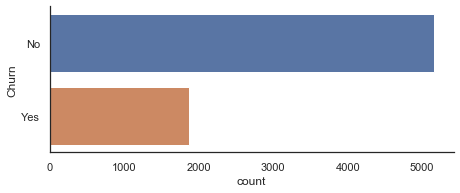

In [10]:
#Lets see out Target column churn
ax = sns.catplot(y="Churn", kind="count", data=tc, height=2.6, aspect=2.5, orient='h')
tc['Churn'].value_counts()

### Demography

#### Gender

In [11]:
tc.gender.unique()

array(['Female', 'Male'], dtype=object)

Male      3549
Female    3483
Name: gender, dtype: int64


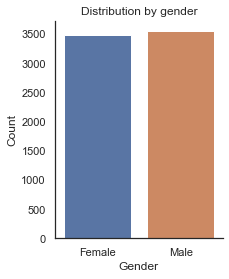

In [12]:
plt.figure(figsize=(3,4))
sns.countplot(x='gender',data=tc)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution by gender')
sns.despine()
print(tc.gender.value_counts())

So, we have a datset with almost equal number from both male and Female Gender

#### Senior Citizen

In [13]:
tc.SeniorCitizen.unique()

array([0, 1], dtype=int64)

0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64


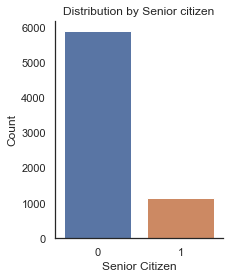

In [14]:
plt.figure(figsize=(3,4))
sns.countplot(x='SeniorCitizen',data=tc)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Distribution by Senior citizen')
sns.despine()
print(tc.SeniorCitizen.value_counts()/len(tc))

16.21% of the customers are senior citizens, which can be one of the major demographic group to target

#### Partner

In [15]:
tc.Partner.unique()

array(['Yes', 'No'], dtype=object)

No     0.517491
Yes    0.482509
Name: Partner, dtype: float64


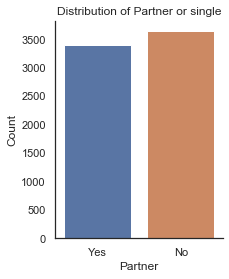

In [16]:
plt.figure(figsize=(3,4))
sns.countplot(x='Partner',data=tc)
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Distribution of Partner or single')
sns.despine()
print(tc.Partner.value_counts()/len(tc))

We can see 51.69% of our customers do not have partners, which can be 
1. Young people
2. Divorced people

#### Dependents

In [17]:
tc.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

No     0.701507
Yes    0.298493
Name: Dependents, dtype: float64


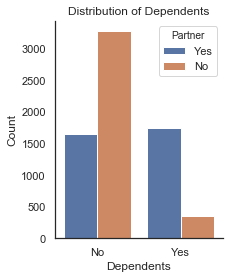

In [18]:
plt.figure(figsize=(3,4))
sns.countplot(x='Dependents', hue='Partner',data=tc)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Distribution of Dependents')
sns.despine()
print(tc.Dependents.value_counts()/len(tc))

For the analysis purpose, i would like to make some assumptions here <br>
1. Dependent=Yes and partner= Yes is assumed as Family
2. Dependent=Yes and partner= No is assumed as Divorcee
3. Dependent=No and partner = Yes is assumed as Ycouple
4. Dependent=No and partner =No, is assumed as Ysingle

### Services

#### PhoneService

In [19]:
tc.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

Yes    0.903299
No     0.096701
Name: PhoneService, dtype: float64


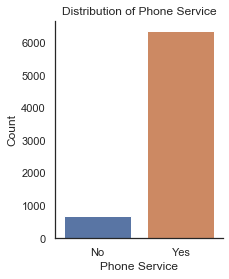

In [20]:
plt.figure(figsize=(3,4))
sns.countplot(x='PhoneService',data=tc)
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.title('Distribution of Phone Service')
sns.despine()
print(tc.PhoneService.value_counts()/len(tc))

#### Multiple Lines

In [21]:
tc.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: MultipleLines, dtype: float64


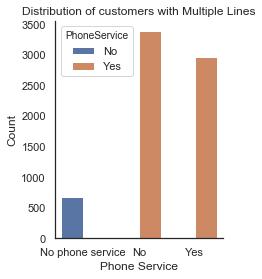

In [22]:
plt.figure(figsize=(3,4))
sns.countplot(x='MultipleLines',hue='PhoneService',data=tc)
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.title('Distribution of customers with Multiple Lines')
sns.despine()
print(tc.MultipleLines.value_counts()/len(tc))

The data is cross checked for any mistakes with phone service and multiple lines and the data is correctly distributed

#### Internet Service

In [23]:
tc.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64


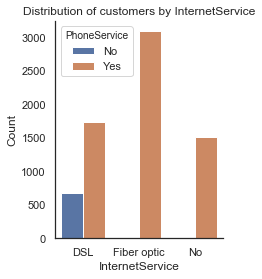

In [24]:
plt.figure(figsize=(3,4))
sns.countplot(x='InternetService',hue='PhoneService',data=tc)
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Distribution of customers by InternetService')
sns.despine()
print(tc.InternetService.value_counts()/len(tc))

We can see that, people with DSL internet service are allowed to to have service without phone line

#### Additional services

These are the services that are offered with either existing phone service or DSL internet service. Lets cross check that once

In [25]:
temp=[]
def no_service_taking(tc):
    if (tc['PhoneService']=='Yes')&(tc['InternetService']=='No'):
        return 'only_phone_service'
    elif (tc['PhoneService']=='Yes')&(tc['InternetService']!='No'):
        return 'both_services'
    elif (tc['PhoneService']=='No')&(tc['InternetService']!='No'):
        return 'DSL_cusotmers'
    else:
        return 'No_service_opted'
        
tc['service_status']=tc.apply(lambda tc:no_service_taking(tc),
                                    axis = 1)

In [26]:
tc.service_status.value_counts()/len(tc)

both_services         0.687144
only_phone_service    0.216155
DSL_cusotmers         0.096701
Name: service_status, dtype: float64

So all the customers are opted for one of the services. We can see that about 9.68% of customers withut phone service are prt of DSL package

#### Additional Services

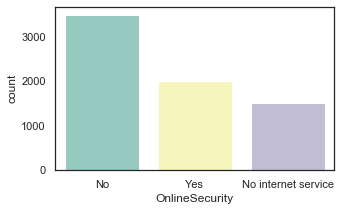

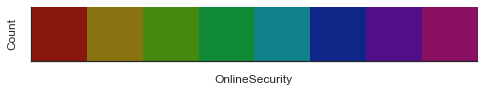

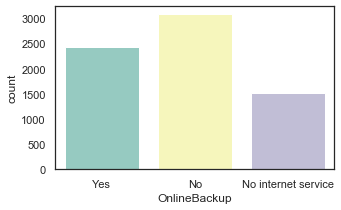

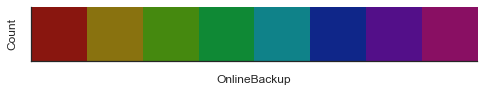

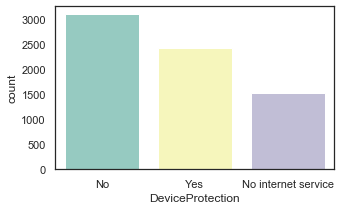

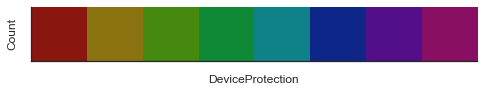

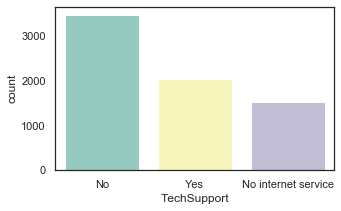

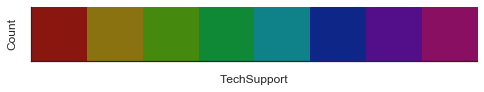

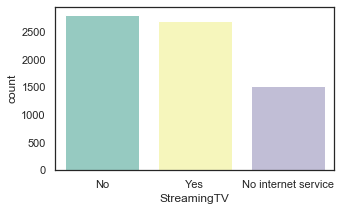

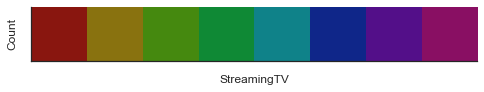

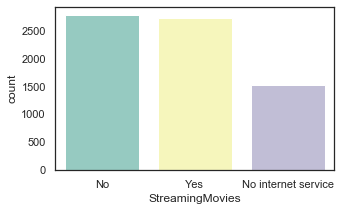

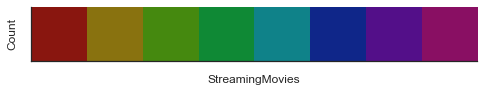

In [27]:
services=['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']
def serviceplot(column):
    plt.figure(figsize=(5,3))
    sns.countplot(x=column,data=tc, palette="Set3")
    sns.palplot(sns.hls_palette(8, l=.3, s=.8))
    plt.xlabel( column)
    plt.ylabel('Count')
    sns.despine()
for i in services:
    serviceplot(i)

### Continuous Variables

#### Tenure

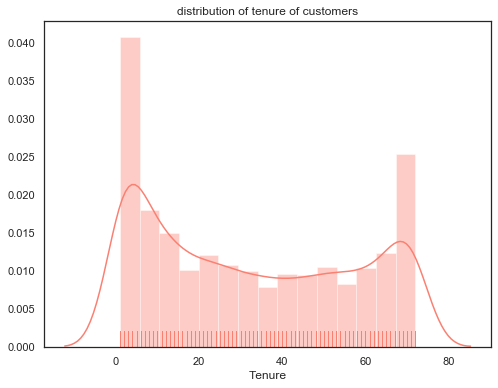

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(tc['tenure'], rug=True, color='salmon')
plt.title('distribution of tenure of customers')
plt.xlabel('Tenure')
plt.show()

we can see that tenure is widely distributed and therefore, putting into bins will help us to plan specific things for specific people

#### Monthly Charges

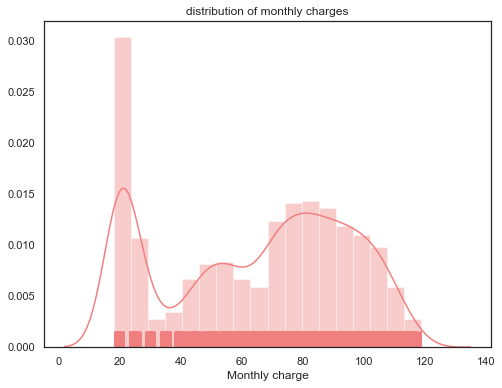

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(tc['MonthlyCharges'], rug=True, color='lightcoral')
plt.title('distribution of monthly charges')
plt.xlabel('Monthly charge')
plt.show()

###### Monthly charges range from 20 to 120, where we can assume that single phone service would charge around 20 and with each additional service the cost can go upto 120. The values can be different for different cusotmers, as each customer will enter and exit at different points or offers or discounts

#### Total Charges

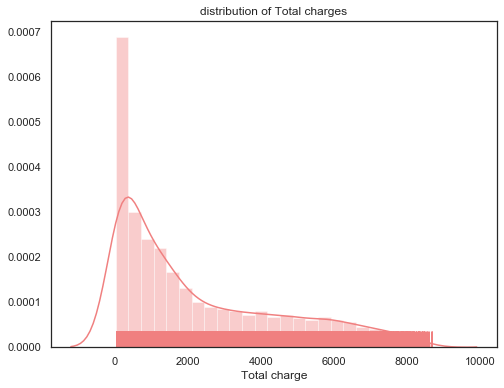

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(tc['TotalCharges'], rug=True, color='lightcoral')
plt.title('distribution of Total charges')
plt.xlabel('Total charge')
plt.show()

###### The distribution of total charge would tell us th escenario that, most of the customers are new as the total charges is peaked at 400 and right skewed with less density

### Account information

In [31]:
accnt_info=['Contract', 'PaperlessBilling', 'PaymentMethod' ]

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Contract, dtype: float64
Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64


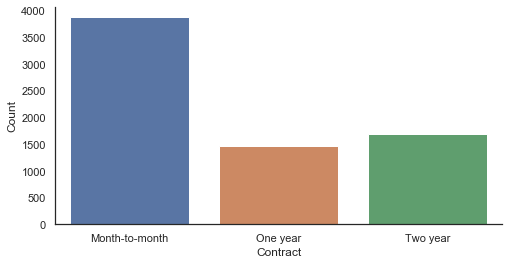

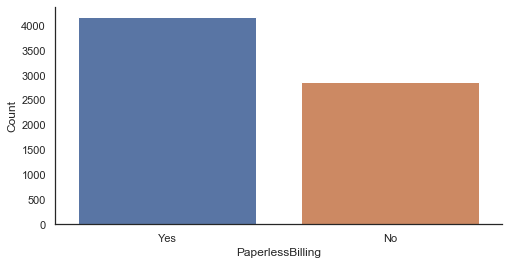

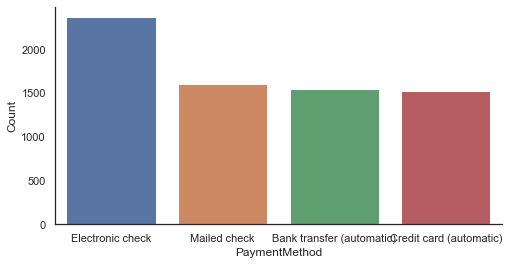

In [32]:
for i in accnt_info:
    plt.figure(figsize=(8,4))
    sns.countplot(x=i,data=tc)
    plt.xlabel(i)
    plt.ylabel('Count')
    sns.despine()
    print(tc[i].value_counts()/len(tc))

- 55% of the cusotmers pay month- to- month payment, while 20.9% have took year long contract while the remaining 23.9% took two year contract.
-  59% people took paperless billing (might be accesing through app or web) and remaining opt for paper billing.
- Although 41% opted for paper billing, payments though check (which means enough time for cashing by company) only 22.8% opted for it

#### service Status

both_services         0.687144
only_phone_service    0.216155
DSL_cusotmers         0.096701
Name: service_status, dtype: float64


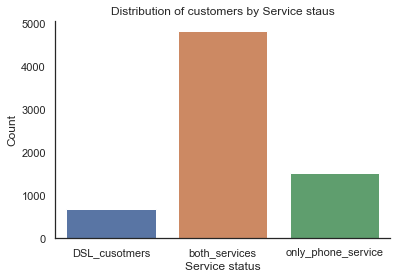

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='service_status',data=tc)
plt.xlabel('Service status')
plt.ylabel('Count')
plt.title('Distribution of customers by Service staus')
sns.despine()
print(tc.service_status.value_counts()/len(tc))

Service status gives you information regarding customers using phone service or Internet service or both
-> customers has to use either phone service or DSL internet service as their basic package to get service from the company.<Br>
    1. 9.67% percent customers are not using phone service but using DSL service as their basic package
    2. 68.71% cusotmers are using both phone service and internet service 
    3. 21.61% people are using phone service only<br>
 We can further explore each of these customer segements and analyse the behaviour and extract the reasons for churn among these. The analysis needs a ittle more data than 7800 entries and therefor, not diving into it

### Bivariate Analysis

#### Monthly charge vs Tenure

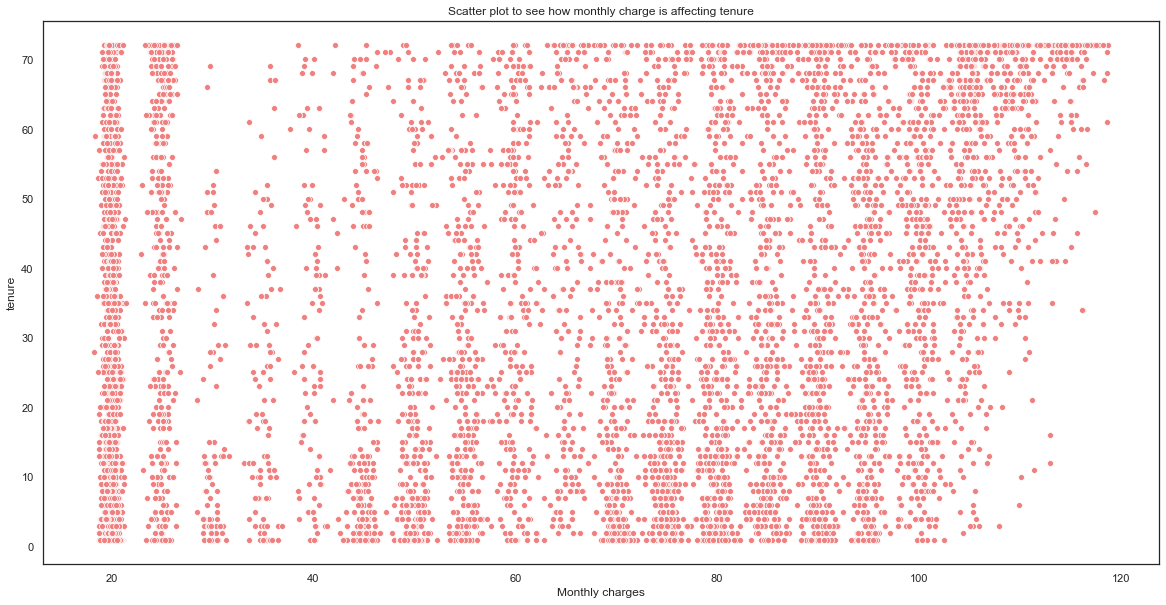

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='MonthlyCharges',y='tenure', data=tc,  color='lightcoral')
plt.title('Scatter plot to see how monthly charge is affecting tenure')
plt.xlabel('Monthly charges')
plt.ylabel('tenure')
plt.show()

We can see that the tenure do not have any impact on monthly charge and therefore, it is safe to assume that no special previlage is given for longer staying people <br>
Also we can see that Monthly charge do not have direct effect on tenure

#### Monthly Charges vs services

In [35]:
services=['PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

<Figure size 1440x720 with 0 Axes>

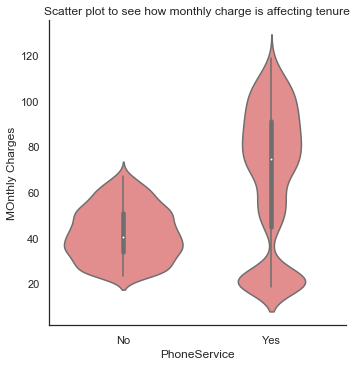

<Figure size 1440x720 with 0 Axes>

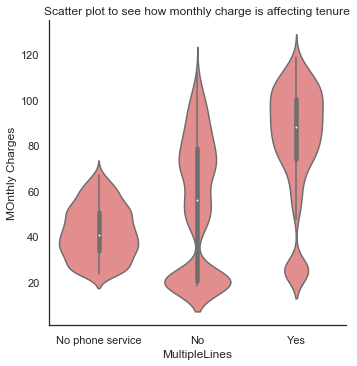

<Figure size 1440x720 with 0 Axes>

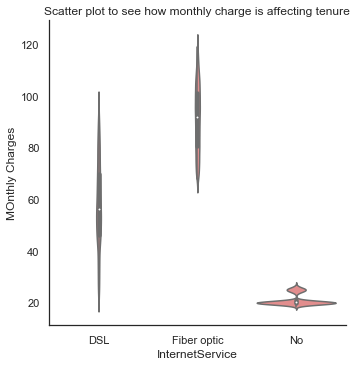

<Figure size 1440x720 with 0 Axes>

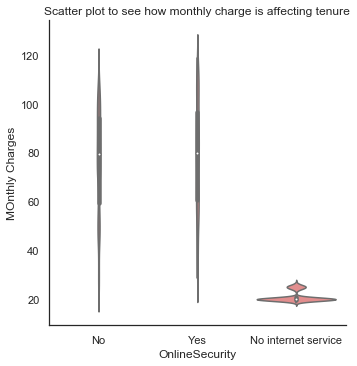

<Figure size 1440x720 with 0 Axes>

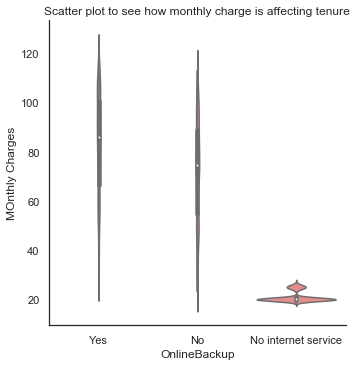

<Figure size 1440x720 with 0 Axes>

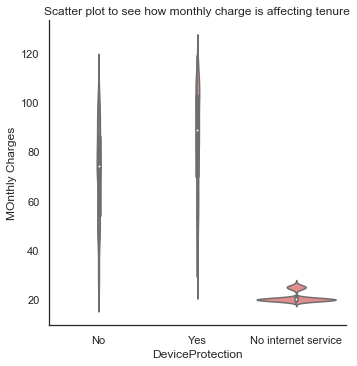

<Figure size 1440x720 with 0 Axes>

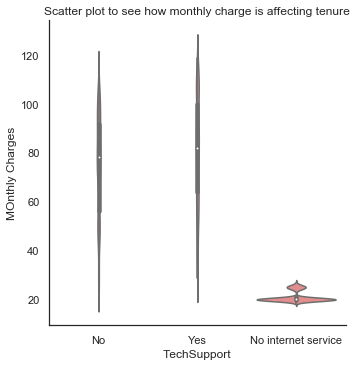

<Figure size 1440x720 with 0 Axes>

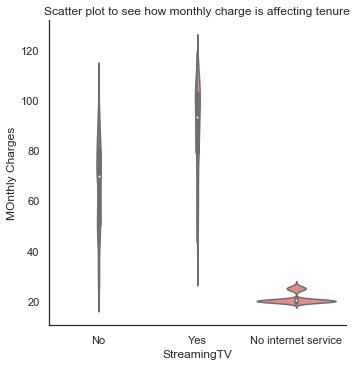

<Figure size 1440x720 with 0 Axes>

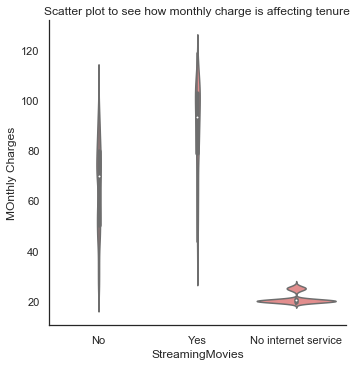

In [36]:
for i in services:
    plt.figure(figsize=(20,10))
    sns.catplot(x=i,y='MonthlyCharges', data=tc, kind='violin', color='lightcoral')
    plt.title('Scatter plot to see how monthly charge is affecting tenure')
    plt.xlabel(i)
    plt.ylabel('MOnthly Charges')
    plt.show()

1. DSL is cheaper than FIber optic. 
2. Only phone service would cost around 20
3. Online security and Tecj support are not costing much
4. Online Backup and Device protection means more devices are added and customers wants to security. Therefore, these are costing a little bit more
5. Streaming movies and Streaming TV are real money spinners here and therefore, more effort should be put into attracting cusotmers to opt for these services

## Target Variable- Churn

In [37]:
#seperating numerical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = tc.nunique()[tc.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in tc.columns if x not in cat_cols + target_col + Id_col]

In [38]:
#Lets see how churn is influenced by each factor
#using interactive pie chart
churning     = tc[tc["Churn"] == 'Yes']
not_churning = tc[tc["Churn"] == 'No' ]
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churning[column].value_counts().values.tolist(),
                    labels  = churning[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = night_colors)
                                  ),
                    hole    = .5
                   )
    trace2 = go.Pie(values  = tc[column].value_counts().values.tolist(),
                    labels  = tc[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = night_colors)
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .5,
                    name    = "Total cusotmers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = 'rgb(6, 4, 4)',
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churning customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Total customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1, trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
for i in cat_cols :
    plot_pie(i)

1. Gender- Gender has no significant effect towards as we can see that churning and non churning customers percentage remains close to 50% in both cases
2. Senior citizen: We can see that there is a significant percentage change in senior citizens in the churning customers. Senior cusotmers are churning more and therefore more attention is needed for senior citizens. 
3. We can see that people without partners are churning more compared to people with partners. People with dependents are churnig less compared to people without dependednts. So from the two factors, we can see that, the services currently offering are satisfying a family than single people. Therefore, a seperate plan should for single cusotmers should be proposed.
4. As we see the pie chart with tenure,
    1. New customers are about 20.9% in total but 41.9% in churning customers. A lot of money is spent on converting a lead into customer and losing them before 6 months defines that services has not attracted the customer or competitor is providing better option.So we need to focus on competitor analysis and also need to attract better service or better cost than competitor.
    2. We are also people majorly in conversion phase and these are people which are still relatively new and need to convert them profitable segemnet sof trusted, loyal and lifetime. 
    3. Of the churning customers, 17.4% belongs to trusted segment form which any telecom comaony  would start earning profits as all the costs spent in converting him or offeres given for him to stay are recovered. Losing them at this stage is decreasing your profitability.
    4. We have 31.8% of loyal & lifetime customers but only 11.4% in churning customers. As this may seem low, but losing a loyal customer means they are effected by service than offers or competitors. 
    
5. From the phone service and multiple lines, we can see that there is no significant effect of phone service in churning
6. From the internet service option, 
    1. People who took Fiber optic, are churning more. 70% of customers churning are takinig Fiber optic, which is basic internet option available. This shows that service is not performing well among customers and need to be better served. The reasons for this can be better service by competitor or servie itself is not satisfying.
    2. People without interet service are not churning more but these are not revenue generating people too. 
8. People with additional services are less churning. so selling additional services to cusotmers, makes them to stay with the company.

##### We are turning churn into binomial variable, to explore its relation with numerical variables

In [39]:
tc['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tc['Churn'].replace(to_replace='No', value=0, inplace=True)
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_status
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,DSL_cusotmers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,both_services
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,both_services
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,DSL_cusotmers
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,both_services


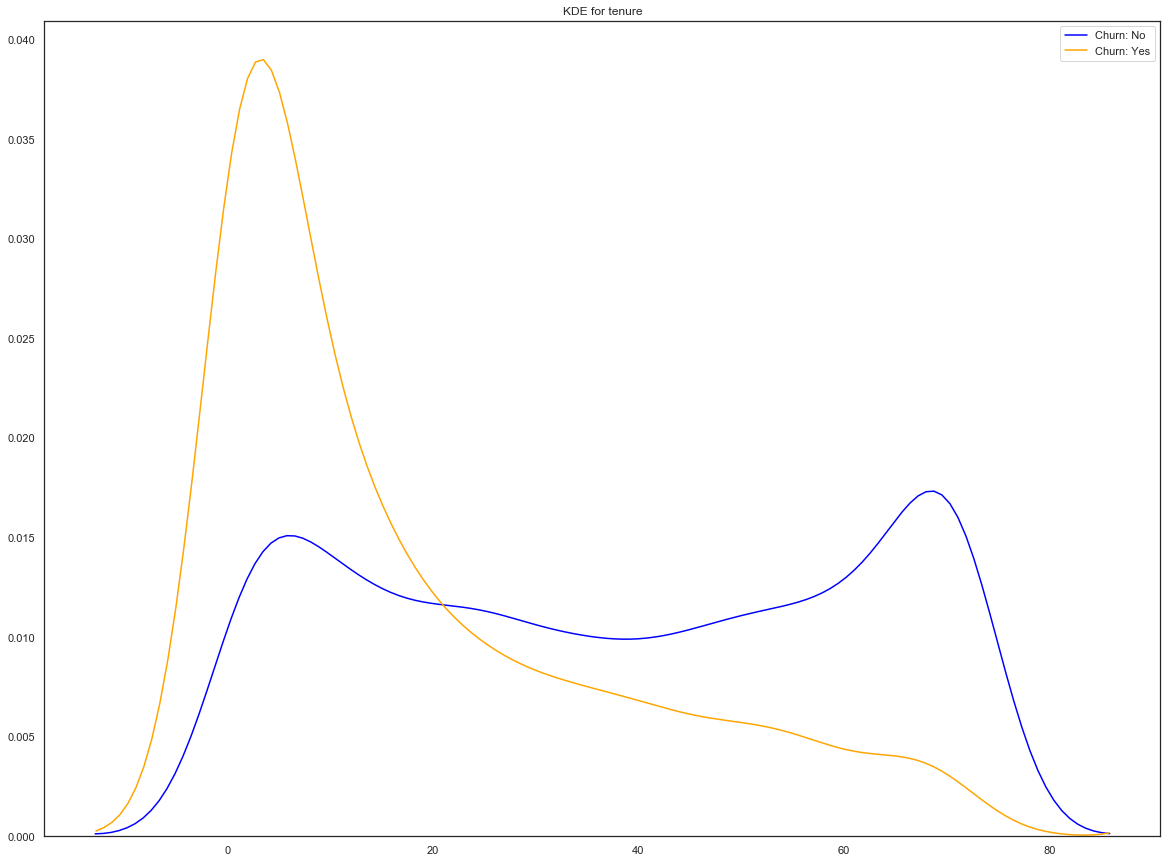

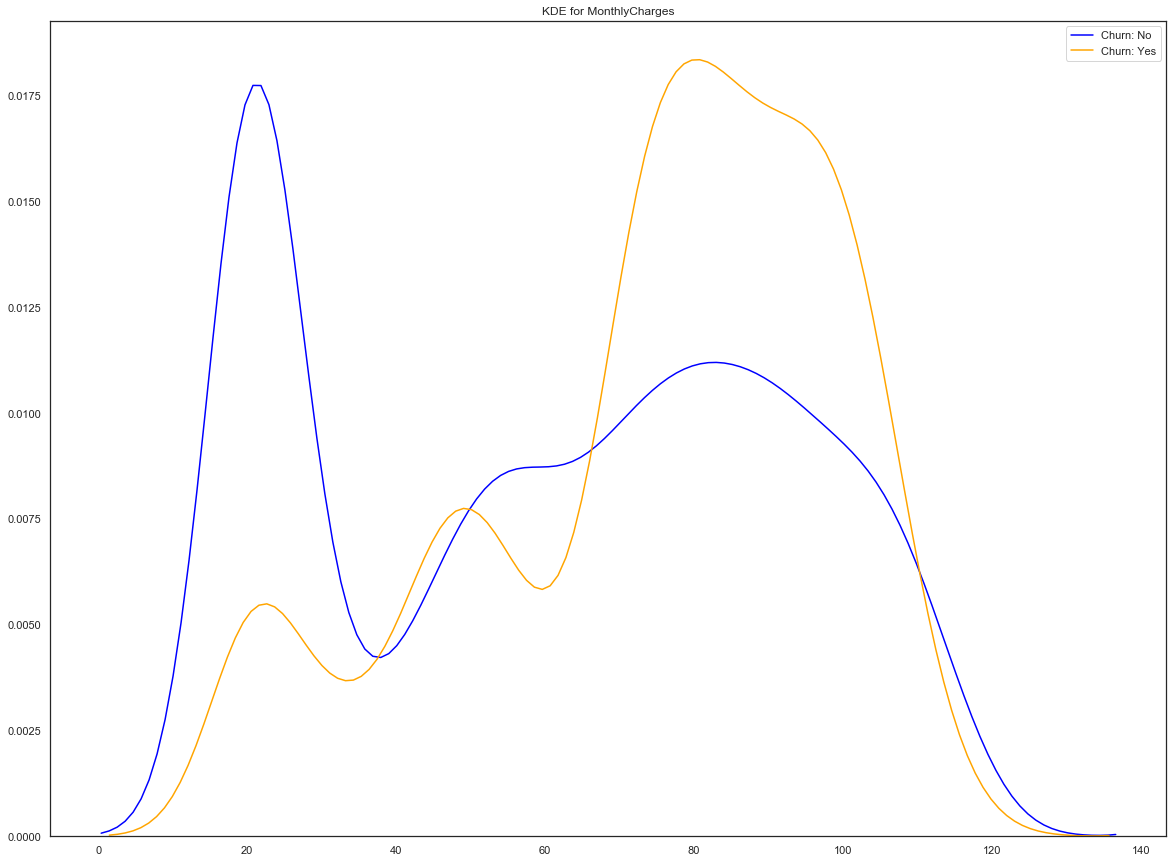

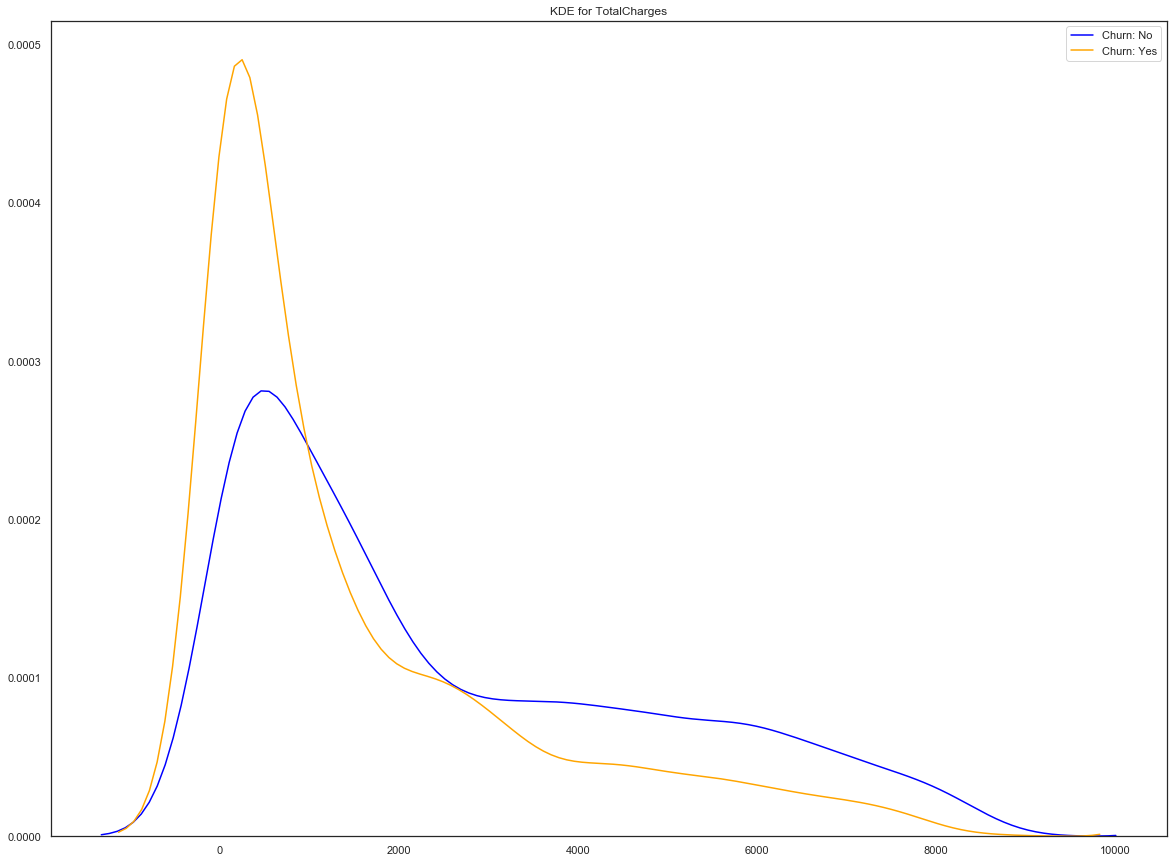

In [40]:
#plotting density plots for numerical variables 
def kdeplot(feature):
    plt.figure(figsize=(20, 15))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(tc[tc["Churn"] == 0][feature], color= 'blue', label= 'Churn: No')
    ax1 = sns.kdeplot(tc[tc["Churn"] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

### Multivariate Variables

In [41]:
tchurn  = tc.sort_values(by = "Churn" ,ascending = True)
classes = tc["Churn"].unique().tolist()
classes
    
class_code  = {classes[k] : k for k in range(2)}
class_code

color_vals = [class_code[cl] for cl in tchurn["Churn"]]
color_vals



fig=go.Figure(data=go.Splom(dimensions = [dict(label  = "tenure",values = tc["tenure"]),
                                  dict(label  = 'MonthlyCharges',values = tc['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',values = tc['TotalCharges']),
                                  dict(label  = 'Churn',values = tc['Churn']  )    ],
                     text= [tchurn.loc[k,"Churn"] for k in range(len(tc))],
                     marker = dict(color = color_vals,
                                   colorscale = "Portland",
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )))
fig.update_layout(title  = "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,height = 800, width  = 800, dragmode = "select",
                             hovermode = "closest", plot_bgcolor  = 'rgba(240,240,240, 0.95)'

)

fig.show()

1. Monthly charge has No great effect on Tenure, as we can see there is no relatiosnhip between them.
2. As tenure increased, we can see a vast difference in total charge and that would say that, people have opted for different services but still stayed for many days.
3. As it should be, the total charge has increased linearly after removing minimum cost to attain service.

To prepare any marketing plan to specific cutomers based on their tenure period, which can be called as loyalty, we need to bin customers into bins based on tenure

In [42]:
def tenure_lab(tc) :
#segmenting customers based on Tenure to tailor marketing strategy to decrease the churn rate and 
#increase the customer value. We are takibg 2 years because there is 2 year contract available here
    if tc["tenure"] <= 6:
        return "New customer"
    elif (tc["tenure"] > 6) & (tc["tenure"] <= 24 ):
        return "Conversion"
    elif (tc["tenure"] > 24) & (tc["tenure"] <= 48) :
        return "Trusted"
    elif (tc["tenure"] > 48) & (tc["tenure"] <= 60) :
        return "Loyal"
    elif tc["tenure"] > 60 :
        return "Lifetime"
tc["grouped_tenure"] = tc.apply(lambda tc:tenure_lab(tc),
                                    axis = 1)


Lets see how contract type is varying among different tenure group

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Contract, dtype: float64


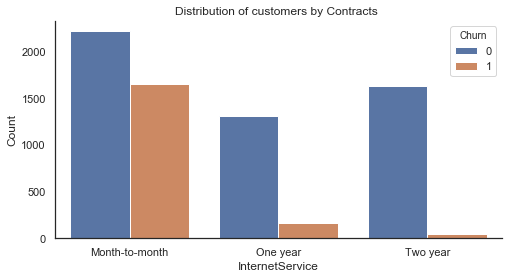

In [43]:
plt.figure(figsize=(8,4))
sns.countplot(hue='Churn',x='Contract',data=tc)
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Distribution of customers by Contracts ')
sns.despine()
print(tc.Contract.value_counts()/len(tc))

Month to month contract has higher churning rate of almost 40% and is way higher than 26% in total.<br>
So, to decrease the CHurn the major idea would be bring customers into longer contract periods<br>
  Two ways to do it are
      1. Introduce new contract periods like 3 months or 6 months, as every body cannot afforf year to year contracts
      2. Provide more features available at lower costs for Year to year contract taking cusotmers./

Conversion      0.245876
Trusted         0.226678
New customer    0.209044
Lifetime        0.200085
Loyal           0.118316
Name: grouped_tenure, dtype: float64


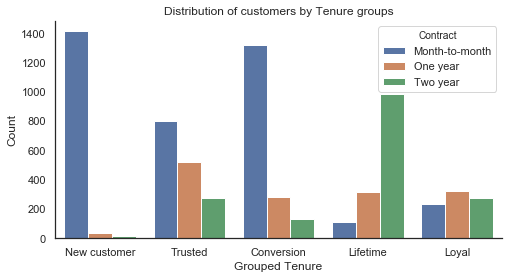

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(x='grouped_tenure',hue='Contract',data=tc)
plt.xlabel('Grouped Tenure')
plt.ylabel('Count')
plt.title('Distribution of customers by Tenure groups')
sns.despine()
print(tc.grouped_tenure.value_counts()/len(tc))

  Most of the new customers, has opted for month to month payments to check with the service nd the churn rate is lot higher in this section.
  We can see that month to month contratc is still higher in trusted and conversion groups, which can be attributed to the fact that these customers are still trying to float, if there is a good option with competetion
  

Conversion      0.245876
Trusted         0.226678
New customer    0.209044
Lifetime        0.200085
Loyal           0.118316
Name: grouped_tenure, dtype: float64


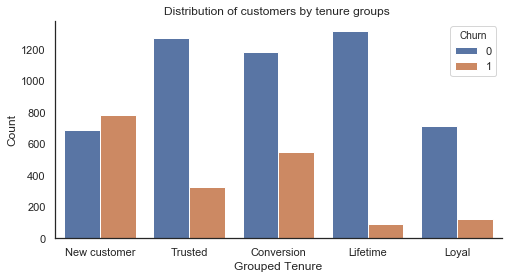

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(hue='Churn',x='grouped_tenure',data=tc)
plt.xlabel('Grouped Tenure')
plt.ylabel('Count')
plt.title('Distribution of customers by tenure groups ')
sns.despine()
print(tc.grouped_tenure.value_counts()/len(tc))

As more people in Lifetime and loyal customers have taken year on year contacts, we can see the effect on churn rate here.<br>
Therefore, more focus in the areas of customer service and competetive features and prices should be gicen to encourage  the customer retention. <br>
The loyal customers staying are having churn rate but losing these customers means losing the profitabilty, as the head costs are recovered and them staying would direclty influence the profits. More customer service should be projected towards these and future advancements in technologies would help them stay for longer times.

### Data preprrocessing

Missing values and Target variable convesion is already done above

In [46]:
tc["SeniorCitizen"] = tc["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [47]:
tc.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
service_status       object
grouped_tenure       object
dtype: object

In [48]:
#lets drop the extra variables created
tc.drop('service_status',axis=1,inplace=True)
tc.drop('grouped_tenure',axis=1,inplace=True)
#lets drop Customer ID
tc.drop('customerID',axis=1,inplace=True)

In [49]:
cr = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'MultipleLines']
for i in cr : 
    tc[i]  = tc[i].replace({'No internet service' : 'No'})

In [50]:
#seperating numerical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = tc.nunique()[tc.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in tc.columns if x not in cat_cols + target_col + Id_col]

#### Correlation Matrix

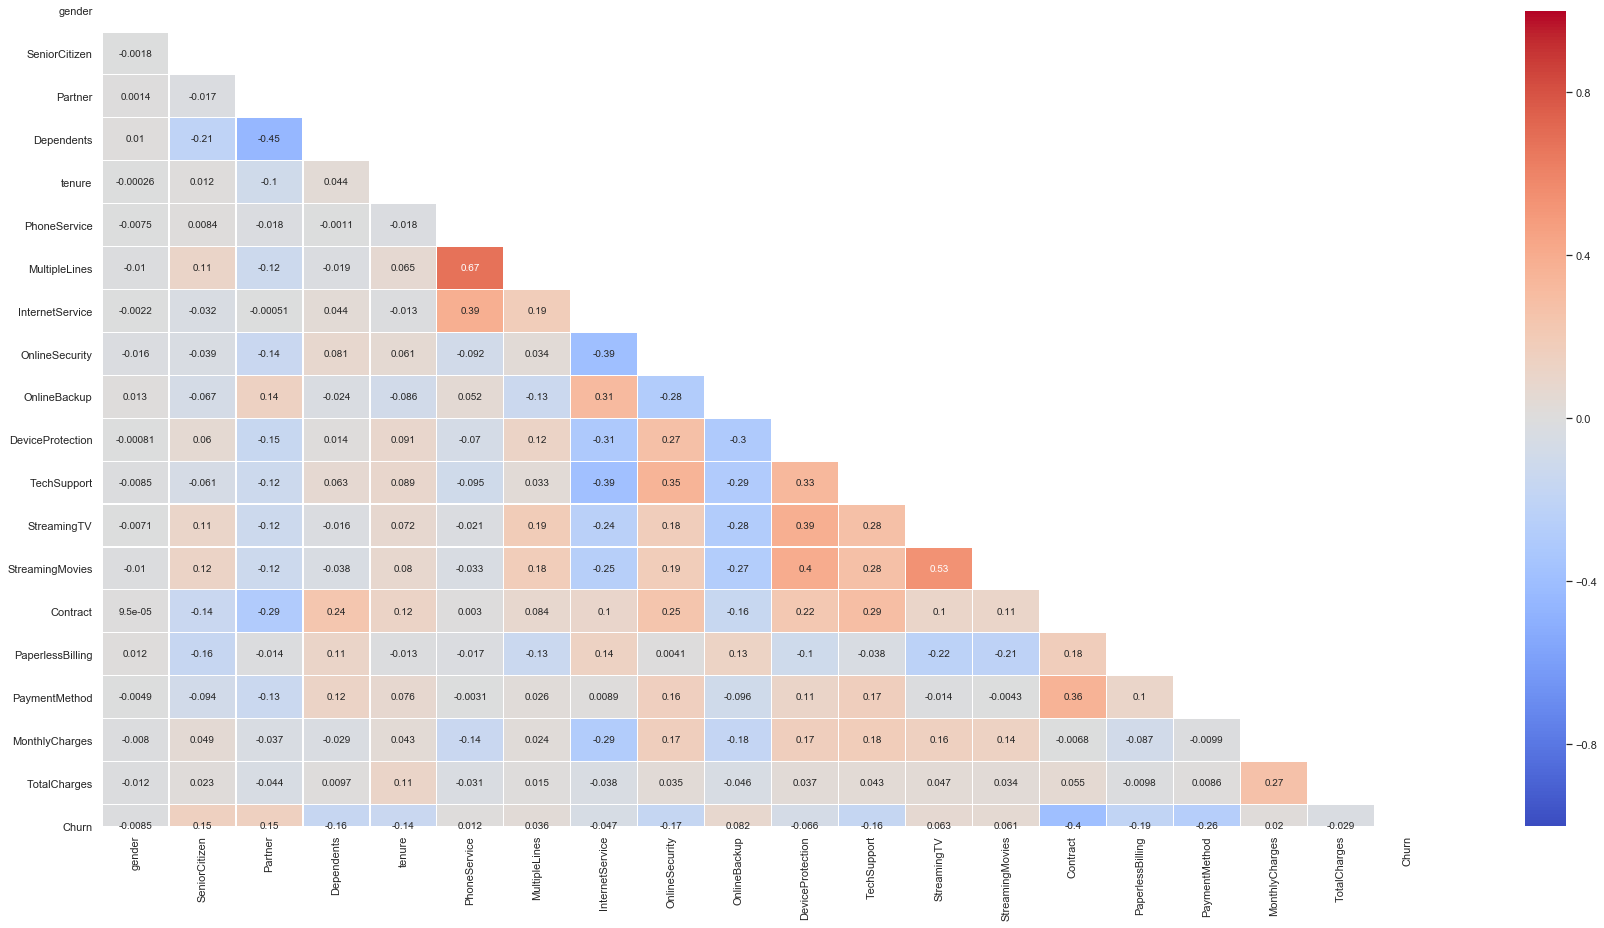

In [51]:
plt.figure(figsize=(30, 15))
corr = tc.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap='coolwarm',vmin=-1, annot=True, mask=mask)

#### Label Encoding Binomial variables

In [52]:
#Binomial veriables encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for x in [i for i in tc.columns if len(tc[i].unique())==2]:
    print(x, tc[x].unique())
    tc[x]= label_encoder.fit_transform(tc[x])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn [0 1]


Since most of our categorical variables have less number of categories, we will be doing one hot encoding

In [53]:
tc.dtypes

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines        object
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [54]:
tc= pd.get_dummies(tc, columns= [i for i in tc.columns if tc[i].dtypes=='object'],drop_first=True)

In [55]:
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


#### Train Test split

In [56]:
#Data splitting
y=tc['Churn'].values
X=tc.drop('Churn', axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#### Data standardisation

In [57]:
#standardisation using standard scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.transform(X_test)

## Modelling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection

### Logistic Regression

In [59]:
lr=LogisticRegression()
result=lr.fit(X_train, y_train)
prediction_test=lr.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.814498933901919


#### Conusion matrix with classification report

              precision    recall  f1-score   support

   chrun_yes       0.86      0.89      0.88      1025
    churn_no       0.68      0.60      0.64       382

    accuracy                           0.81      1407
   macro avg       0.77      0.75      0.76      1407
weighted avg       0.81      0.81      0.81      1407



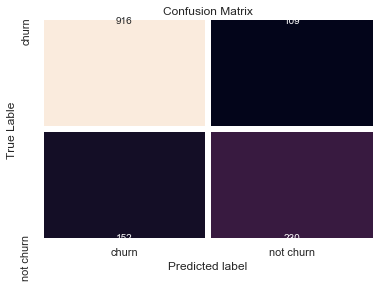

In [60]:
conf_matrix=confusion_matrix( y_test ,prediction_test)
sns.heatmap(conf_matrix, annot=True, fmt="d",xticklabels=['churn','not churn'],yticklabels=['churn','not churn'],
            linewidth=5,cbar=False)
plt.ylabel('True Lable')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
print(classification_report(y_test, prediction_test, target_names=['chrun_yes','churn_no']))

#### Metrics

In [61]:
prediction_proba = lr.predict_proba(X_test)
report_ = []
lines = classification_report(y_test, prediction_test).split('\n')
for l in lines[2:-4]:
    row_ = l.split()
    if len(row_) != 0:
        row = {}
        row['precision'] = float(row_[-4])
        row['recall'] = float(row_[-3])
        row['f1_score'] = float(row_[-2])
        row['support'] = float(row_[-1])
        row['class'] = {1: "Churn", 0: "No Churn"}[int(row_[0])]
        report_.append(row)
dataframe = pd.DataFrame.from_dict(report_)
dataframe.head()

,precision,recall,f1_score,support,class
0,0.86,0.89,0.88,1025.0,No Churn
1,0.68,0.60,0.64,382.0,Churn


#### Feature Importance

In [62]:
print(lr.coef_)

[[-0.01471251  0.08394729 -0.01379076 -0.06095167 -1.37291295 -0.05549935
  -0.1181221  -0.04801458  0.00448241 -0.13610388  0.16958907  0.1670622
   0.17252656 -0.49244823  0.66681374  0.05549935  0.14218473  0.61988852
  -0.46638907 -0.32304438 -0.58508033 -0.0381738   0.1159502  -0.04829139]]


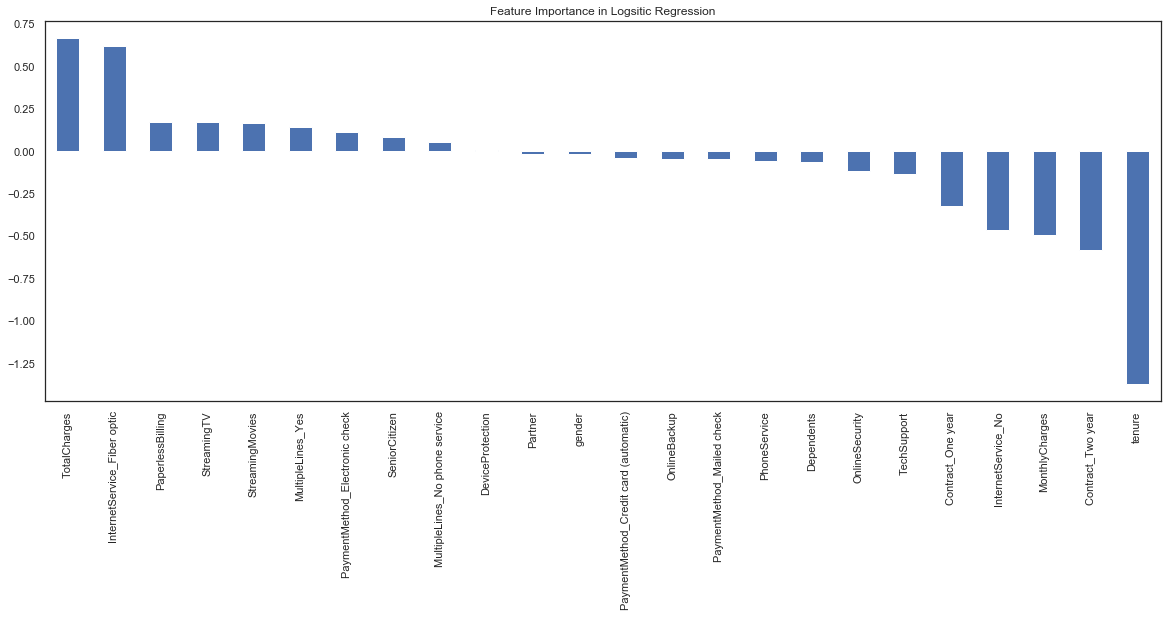

In [63]:
weights=pd.Series(lr.coef_[0],index=X.columns.values) 
plt.figure(figsize=(20,7))
weights.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in Logsitic Regression')
plt.show()



1. Total charges is the most important feature for Churn to be low.
2. Internet service should be Fiber optic.

#### ROC Curve

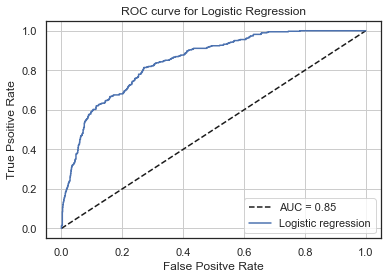

In [64]:
#ROC curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

trgt_pred_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,trgt_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--', label = 'AUC = %0.2f' % roc_auc )
plt.plot(fpr,tpr,label='Logistic regression')
plt.xlabel('False Positve Rate')
plt.ylabel('True Psoitive Rate')
plt.title('ROC curve for Logistic Regression')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()


Predicting Churn is more important in this case, as the chance of losing the cusotmer is more important.<br>
precision of 69% which is very low

### Logistic Regression with SMOTE

In [65]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=101)
X_train_smote, y_train_smote=sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [66]:
result=lr.fit(X_train_smote, y_train_smote)
prediction_test1=lr.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test1))

0.746268656716418


In [67]:
prediction_proba = lr.predict_proba(X_test)
report_ = []
lines = classification_report(y_test, prediction_test1).split('\n')
for l in lines[2:-4]:
    row_ = l.split()
    if len(row_) != 0:
        row = {}
        row['precision'] = float(row_[-4])
        row['recall'] = float(row_[-3])
        row['f1_score'] = float(row_[-2])
        row['support'] = float(row_[-1])
        row['class'] = {1: "Churn", 0: "No Churn"}[int(row_[0])]
        report_.append(row)
dataframe = pd.DataFrame.from_dict(report_)
dataframe.head()

,precision,recall,f1_score,support,class
0,0.91,0.72,0.81,1025.0,No Churn
1,0.52,0.81,0.63,382.0,Churn


We can now confirm that, Over sampling or under sampling have less effect in the case of Regression Algorithms

## LogisticRegressionCV

In [68]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv=LogisticRegressionCV(cv=10, random_state=0)
lr_cv_fit=lr_cv.fit(X_test, y_test)
y_hat_lrcv=lr_cv.predict(X_test)
print(metrics.accuracy_score(y_test, y_hat_lrcv))

0.8116560056858564


### Logistic Regression Cross Validation

In [69]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)

kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline     ,X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [70]:
cv_results

array([0.78693182, 0.80397727, 0.80796586, 0.79089616, 0.82219061,
       0.79800853, 0.81365576, 0.82503556, 0.78236131, 0.81081081])

## Random Forrest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [72]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)
y_hat_rf=rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_hat_rf))

0.7967306325515281


#### With SMOTE

In [73]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train_smote, y_train_smote)
y_hat1=rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_hat1))

0.7818052594171997


### Metrics

In [74]:
prediction_proba = rf.predict_proba(X_test)
report_ = []
lines = classification_report(y_test, y_hat_rf).split('\n')
for l in lines[2:-4]:
    row_ = l.split()
    if len(row_) != 0:
        row = {}
        row['precision'] = float(row_[-4])
        row['recall'] = float(row_[-3])
        row['f1_score'] = float(row_[-2])
        row['support'] = float(row_[-1])
        row['class'] = {1: "Churn", 0: "No Churn"}[int(row_[0])]
        report_.append(row)
dataframe = pd.DataFrame.from_dict(report_)
dataframe.head()

,precision,recall,f1_score,support,class
0,0.84,0.89,0.86,1025.0,No Churn
1,0.65,0.55,0.60,382.0,Churn


#### ROC Curve

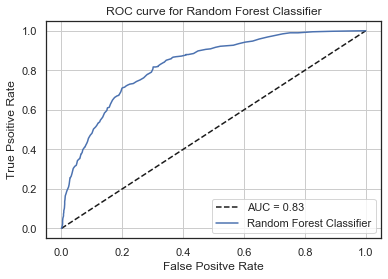

In [75]:
trgt_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,trgt_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--', label = 'AUC = %0.2f' % roc_auc )
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positve Rate')
plt.ylabel('True Psoitive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

#### Classification Matrix and Classification Report

              precision    recall  f1-score   support

   chrun_yes       0.86      0.89      0.88      1025
    churn_no       0.68      0.60      0.64       382

    accuracy                           0.81      1407
   macro avg       0.77      0.75      0.76      1407
weighted avg       0.81      0.81      0.81      1407



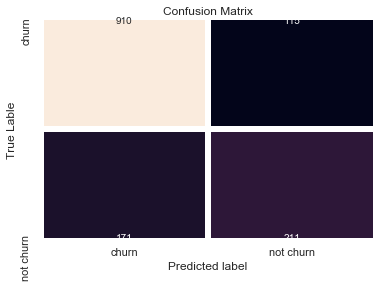

In [76]:
conf_matrix=confusion_matrix( y_test ,y_hat_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d",xticklabels=['churn','not churn'],yticklabels=['churn','not churn'],
            linewidth=5,cbar=False)
plt.ylabel('True Lable')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
print(classification_report(y_test, prediction_test, target_names=['chrun_yes','churn_no']))

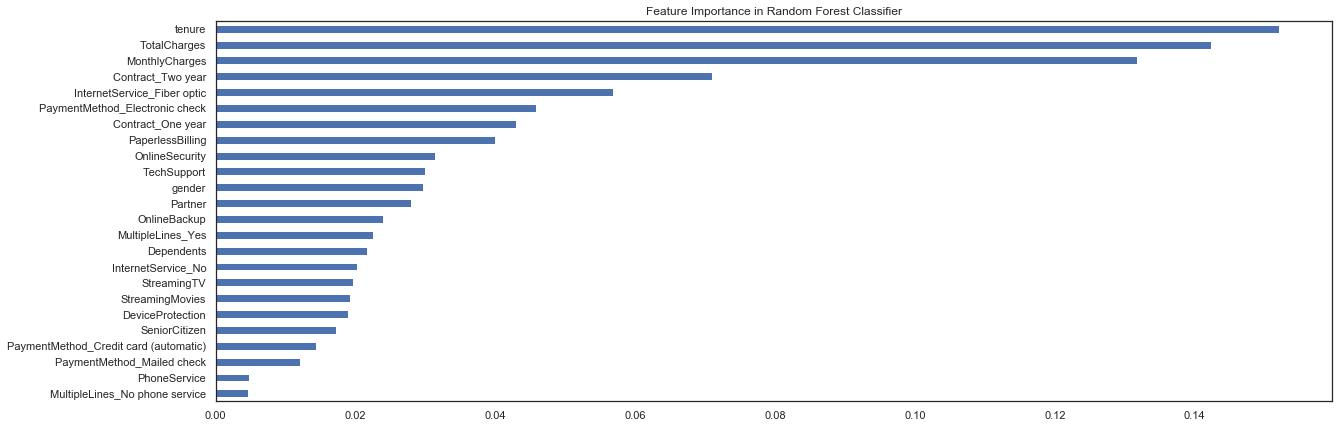

In [77]:
importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
plt.figure(figsize=(20,7))
weights.sort_values().plot(kind = 'barh')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

The important features are same for both Logistic and Random Forest

## Support Vector Machine

In [78]:
from sklearn.svm import SVC
svm= SVC(probability=True, kernel='linear')
svm.fit(X_train,y_train)
y_hat_svm=svm.predict(X_test)
print(metrics.accuracy_score(y_test,y_hat_svm))

0.7967306325515281


In [79]:
prediction_proba = svm.predict_proba(X_test)
report_ = []
lines = classification_report(y_test, y_hat_svm).split('\n')
for l in lines[2:-4]:
    row_ = l.split()
    if len(row_) != 0:
        row = {}
        row['precision'] = float(row_[-4])
        row['recall'] = float(row_[-3])
        row['f1_score'] = float(row_[-2])
        row['support'] = float(row_[-1])
        row['class'] = {1: "Churn", 0: "No Churn"}[int(row_[0])]
        report_.append(row)
dataframe = pd.DataFrame.from_dict(report_)
dataframe.head()

,precision,recall,f1_score,support,class
0,0.84,0.88,0.86,1025.0,No Churn
1,0.64,0.56,0.60,382.0,Churn


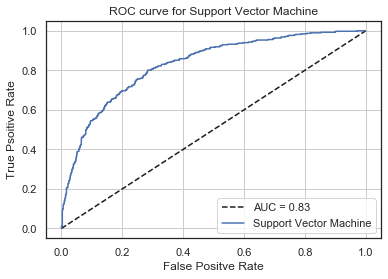

In [80]:
trgt_pred_prob=svm.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,trgt_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--', label = 'AUC = %0.2f' % roc_auc )
plt.plot(fpr,tpr,label='Support Vector Machine')
plt.xlabel('False Positve Rate')
plt.ylabel('True Psoitive Rate')
plt.title('ROC curve for Support Vector Machine')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

   chrun_yes       0.86      0.89      0.88      1025
    churn_no       0.68      0.60      0.64       382

    accuracy                           0.81      1407
   macro avg       0.77      0.75      0.76      1407
weighted avg       0.81      0.81      0.81      1407



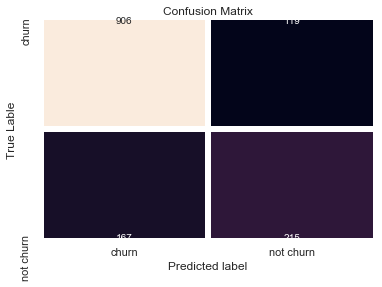

In [81]:
conf_matrix=confusion_matrix( y_test ,y_hat_svm)
sns.heatmap(conf_matrix, annot=True, fmt="d",xticklabels=['churn','not churn'],yticklabels=['churn','not churn'],
            linewidth=5,cbar=False)
plt.ylabel('True Lable')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
print(classification_report(y_test, prediction_test, target_names=['chrun_yes','churn_no']))

## KNN Classifier

In [82]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_hat_knn=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_hat_knn))

0.7668798862828714


              precision    recall  f1-score   support

   chrun_yes       0.86      0.89      0.88      1025
    churn_no       0.68      0.60      0.64       382

    accuracy                           0.81      1407
   macro avg       0.77      0.75      0.76      1407
weighted avg       0.81      0.81      0.81      1407



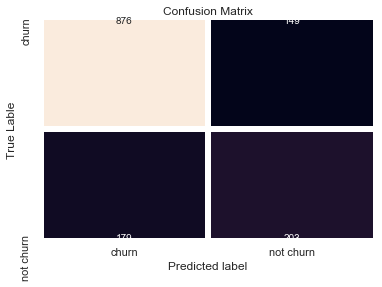

In [83]:
conf_matrix=confusion_matrix( y_test ,y_hat_knn)
sns.heatmap(conf_matrix, annot=True, fmt="d",xticklabels=['churn','not churn'],yticklabels=['churn','not churn'],
            linewidth=5,cbar=False)
plt.ylabel('True Lable')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
print(classification_report(y_test, prediction_test, target_names=['chrun_yes','churn_no']))

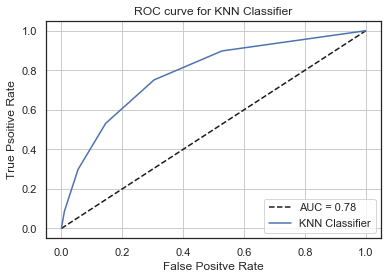

In [84]:
trgt_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,trgt_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--', label = 'AUC = %0.2f' % roc_auc )
plt.plot(fpr,tpr,label='KNN Classifier')
plt.xlabel('False Positve Rate')
plt.ylabel('True Psoitive Rate')
plt.title('ROC curve for KNN Classifier')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

## Model Comparision

In [85]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [86]:
import plotly.figure_factory as ff
model1 = model_report(lr,X_train,X_test,y_train,y_test,
                      "Logistic Regression")
model2 = model_report(rf,X_train,X_test,y_train,y_test,
                      "Random FOrest Classifier")
model3 = model_report(svm,X_train,X_test,y_train,y_test,
                      "SUpport Vector Machine")
model4 = model_report(knn,X_train,X_test,y_train,y_test,
                      "KNN Classifier")

model_performances= pd.concat([model1, model2, model3, model4], axis=0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,5))

py.iplot(table)

#### Accuracy using Cross Validation

In [91]:
#Model comparision
from sklearn import model_selection

models=[]
models.append(('lr', LogisticRegression()))
models.append(('rf', RandomForestClassifier()))
models.append(('svm', SVC()))
models.append(('knn', KNeighborsClassifier()))
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state='seed')
    cv_results = model_selection.cross_val_score(model, X, y , cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.max(), cv_results.mean())
    print(msg)


lr: 0.820768 (0.803043)
rf: 0.820768 (0.792945)
svm: 0.750000 (0.734215)
knn: 0.775568 (0.763082)


In [87]:
#Model comparision
from sklearn import model_selection

models=[]
models.append(('lr', LogisticRegression()))
models.append(('rf', RandomForestClassifier()))
models.append(('svm', SVC()))
models.append(('knn', KNeighborsClassifier()))
results=[]
names=[]
scoring='precision'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state='seed')
    cv_results = model_selection.cross_val_score(model, X, y , cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.max(), cv_results.mean())
    print(msg)


lr: 0.696774 (0.657209)
rf: 0.718310 (0.642163)
svm: 0.000000 (0.000000)
knn: 0.641379 (0.570411)


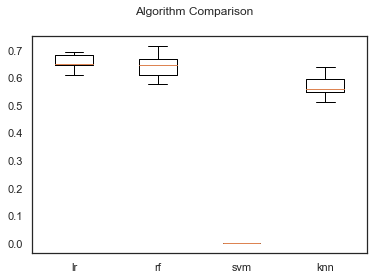

In [88]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### As in this case, precision is an important parameter to identify the churning customer. Therefore, based on the precision after cross validation, we can see that Ranfom Forest has highest precision value with 0.71,w hich should be our model